# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Write the problem in your own words here

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#etc

#your info here
__author__ = "Samuel"
__email__ = "samuel.thudi@gmail.com"

## Part 2 - DISCOVER

In [2]:
#load the data into a Pandas dataframe
train_feature_df = pd.read_csv(r'C:\Users\samue\Downloads/data/train_features.csv')
train_target_df = pd.read_csv(r'C:\Users\samue\Downloads\data/train_salaries.csv')
test_feature_df = pd.read_csv(r'C:\Users\samue\Downloads\data/test_features.csv')

### ---- Clean the data ----

In [3]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
train_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
train_feature_df[train_feature_df['milesFromMetropolis']>50].degree

0             MASTERS
1         HIGH_SCHOOL
7           BACHELORS
8         HIGH_SCHOOL
9           BACHELORS
             ...     
999988       DOCTORAL
999989    HIGH_SCHOOL
999994      BACHELORS
999995      BACHELORS
999997    HIGH_SCHOOL
Name: degree, Length: 490549, dtype: object

## checking for missing values 

In [5]:
train_feature_df[(train_feature_df['major']=='NONE') & (train_feature_df['degree']=='NONE')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
12,JOB1362684407699,COMP4,JUNIOR,NONE,NONE,OIL,8,29
14,JOB1362684407701,COMP57,JANITOR,NONE,NONE,AUTO,21,81
20,JOB1362684407707,COMP44,JANITOR,NONE,NONE,SERVICE,11,96
21,JOB1362684407708,COMP20,JUNIOR,NONE,NONE,AUTO,14,62
...,...,...,...,...,...,...,...,...
999977,JOB1362685407664,COMP28,CFO,NONE,NONE,HEALTH,12,46
999978,JOB1362685407665,COMP53,VICE_PRESIDENT,NONE,NONE,SERVICE,18,94
999984,JOB1362685407671,COMP1,CTO,NONE,NONE,SERVICE,6,20
999985,JOB1362685407672,COMP62,CEO,NONE,NONE,AUTO,5,13


In [6]:
full_data = train_feature_df.copy()
full_data['salary'] = train_target_df['salary']

In [7]:
zero_salary_rows = full_data[full_data['salary']==0].index
full_data = full_data.drop(zero_salary_rows)
full_data.shape

(999995, 9)

In [8]:
#Checking unique values in each column (categorical) to see if it has empty values.
def unique_and_null_categorical(dataset):
    dataset_cat = pd.DataFrame(dataset.select_dtypes(include='object'))
    for i in dataset_cat.columns:
        if i == 'jobId':
            print('JobId is Unique')
            print('Unique values in jobId:',dataset[i].nunique(),'\n')
        else:
            print(i,":",'\n',dataset[i].unique(),'\n','number of unique values:',dataset[i].nunique())
            print();
            
#checking null and 0 values in continuous variables
def unique_and_null_continuous(dataset):
    dataset_cont = dataset.select_dtypes(include=[np.number])
    print(dataset_cont.describe())
    for i in dataset_cont.columns:
        col = dataset_cont[dataset_cont[i]==0].count()
        print(i,':\n',col[i])
        
#Highest salary per category        
def highest_salary_per_category(dataframe,category,target):
    grouped_table = dataframe.groupby(category)[target].mean().to_frame().reset_index()
    return grouped_table.sort_values(target).reset_index()

#Highest mean salary per category table
def highest_sal_per_2groups(dataframe,category):
    grouped_table = highest_salary_per_category(dataframe,category,'salary').drop('index',axis =1)
    if len(category) ==2:
        index_values = grouped_table.groupby(category[0])['salary'].idxmax()
        grouped_table = grouped_table.iloc[index_values]
        return grouped_table.reset_index().drop('index',axis=1)
    else: 
        print("category length must be 2")
    


#plotting the highest salary in barplot
def highest_sal_category_barplot(dataframe,category):
    dataset = highest_salary_per_category(dataframe,category,'salary')
    category_is_str = isinstance(category, str)
    plot_title = category if category_is_str else ' and '.join(category)
    
    if len(category) == 2: 
        x_value = category[0]
        hue_value = category[1]
    else: 
        x_value = category
        hue_value = None 
        
    plt.style.use('seaborn-poster')
    plt.figure(figsize=(7,7))
    ax = sns.barplot(x = x_value, y = 'salary',hue=hue_value,data = dataset)
    if len(category) == 2:
        sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))
    plt.title('Highest average salary per '+ plot_title )
    plt.xticks(rotation=45)
    plt.show()
    
    
def highest_and_lowest_salaries_plot(dataset,by,column,percent): 
    if by == 'high':
        top = dataset['salary'].quantile(1 - percent)
        top_sal = dataset[dataset.salary > top]
        top_sal[column].value_counts().plot.bar(colormap = 'viridis')
        plt.title('The number of %s paying jobs in the top %.1f percent by %s' %(by,percent*100,column))
        plt.xticks(rotation = 45)
    elif by == 'low': 
        low = dataset['salary'].quantile(percent)
        low_sal = dataset[dataset.salary < low]
        low_sal[column].value_counts().plot.bar(colormap = 'Set2')
        plt.title('The number of %s paying jobs in the bottom %.1f percent by %s' %(by,percent*100,column))
        plt.xticks(rotation = 45)
    else: 
        print('"by" should either be high or low')
        
        
def _encode_category(data, col, i):
    '''Replace category labels with the median value, for checking correlations'''
    category_dict = dict()
    categories = data[col].unique().tolist()
    
    # For each level in the category, calculate the median
    if i == 'median':
        for cat in categories:
            category_dict[cat] = data[data[col] == cat]['salary'].median()
    else: 
        for cat in categories:
            category_dict[cat] = data[data[col] == cat]['salary'].mean()
    
    # Map the median values to the data
    data[col] = data[col].map(category_dict)
    
def correlation_plot(df, category_cols,i):
    '''Make a correlation plot, encode categorical columns so that each levels label is replaced by the median price for that level'''
    # copy data to avoid altering the original
    data = df.copy()
    
    # Encode each categorical level with the median
    for col in category_cols:
        _encode_category(data, col,i)
    
    # Plot
    plt.figure(figsize = (12, 10))
    
    corr = data.corr()
    
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    sns.heatmap(corr, cmap='bwr', annot = True,vmin= -1, vmax = 1,mask = mask)
    
    plt.title('correlation by %s' %i)
    
    plt.show()

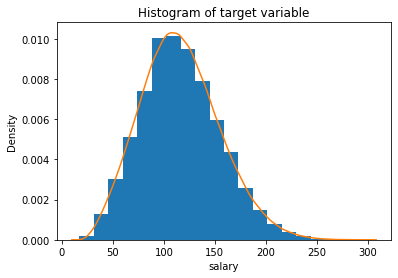

In [9]:
plt.hist(full_data['salary'],bins = 20 , density= True)
sns.kdeplot(full_data['salary'])
plt.title('Histogram of target variable')
plt.show()

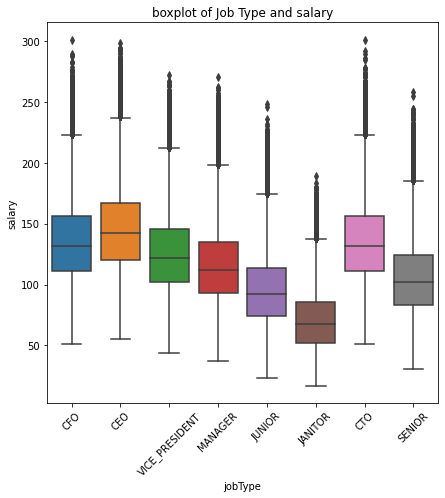

In [10]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x="jobType", y="salary", ax=ax, data=full_data)
plt.title('boxplot of Job Type and salary')
plt.xticks(rotation=45);

In [11]:
unique_and_null_categorical(full_data)

JobId is Unique
Unique values in jobId: 999995 

companyId : 
 ['COMP37' 'COMP19' 'COMP52' 'COMP38' 'COMP7' 'COMP15' 'COMP24' 'COMP20'
 'COMP41' 'COMP56' 'COMP4' 'COMP54' 'COMP57' 'COMP14' 'COMP61' 'COMP58'
 'COMP3' 'COMP44' 'COMP30' 'COMP27' 'COMP34' 'COMP11' 'COMP31' 'COMP49'
 'COMP0' 'COMP1' 'COMP36' 'COMP47' 'COMP8' 'COMP42' 'COMP50' 'COMP53'
 'COMP48' 'COMP45' 'COMP46' 'COMP2' 'COMP5' 'COMP55' 'COMP29' 'COMP40'
 'COMP33' 'COMP22' 'COMP12' 'COMP25' 'COMP6' 'COMP23' 'COMP17' 'COMP28'
 'COMP21' 'COMP26' 'COMP43' 'COMP51' 'COMP10' 'COMP59' 'COMP13' 'COMP39'
 'COMP16' 'COMP9' 'COMP32' 'COMP62' 'COMP35' 'COMP18' 'COMP60'] 
 number of unique values: 63

jobType : 
 ['CFO' 'CEO' 'VICE_PRESIDENT' 'MANAGER' 'JUNIOR' 'JANITOR' 'CTO' 'SENIOR'] 
 number of unique values: 8

degree : 
 ['MASTERS' 'HIGH_SCHOOL' 'DOCTORAL' 'BACHELORS' 'NONE'] 
 number of unique values: 5

major : 
 ['MATH' 'NONE' 'PHYSICS' 'CHEMISTRY' 'COMPSCI' 'BIOLOGY' 'LITERATURE'
 'BUSINESS' 'ENGINEERING'] 
 number of unique 

In [12]:
unique_and_null_continuous(full_data)

       yearsExperience  milesFromMetropolis         salary
count    999995.000000        999995.000000  999995.000000
mean         11.992407            49.529381     116.062398
std           7.212390            28.877721      38.717163
min           0.000000             0.000000      17.000000
25%           6.000000            25.000000      88.000000
50%          12.000000            50.000000     114.000000
75%          18.000000            75.000000     141.000000
max          24.000000            99.000000     301.000000
yearsExperience :
 39839
milesFromMetropolis :
 10123
salary :
 0


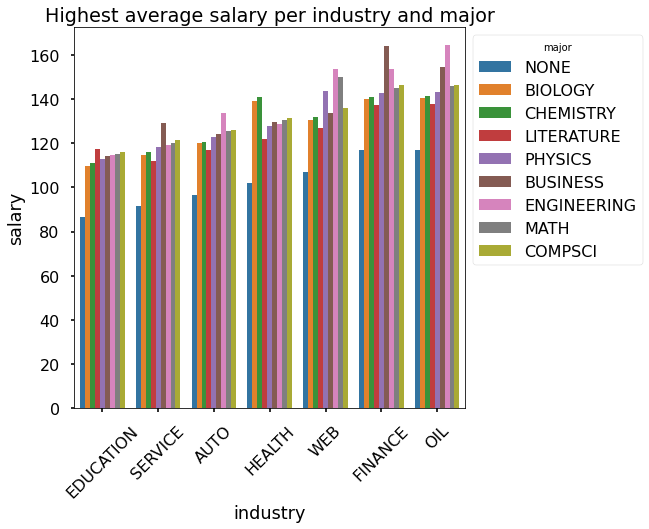

In [13]:
highest_sal_category_barplot(full_data,['industry','major'])

In [14]:
highest_sal_per_2groups(full_data,['industry','major'])

,industry,major,salary
0,AUTO,ENGINEERING,133.849124
1,EDUCATION,LITERATURE,117.348382
2,FINANCE,BUSINESS,164.124165
3,HEALTH,CHEMISTRY,140.914052
4,OIL,ENGINEERING,164.458731
5,SERVICE,BUSINESS,129.265618
6,WEB,ENGINEERING,153.874363


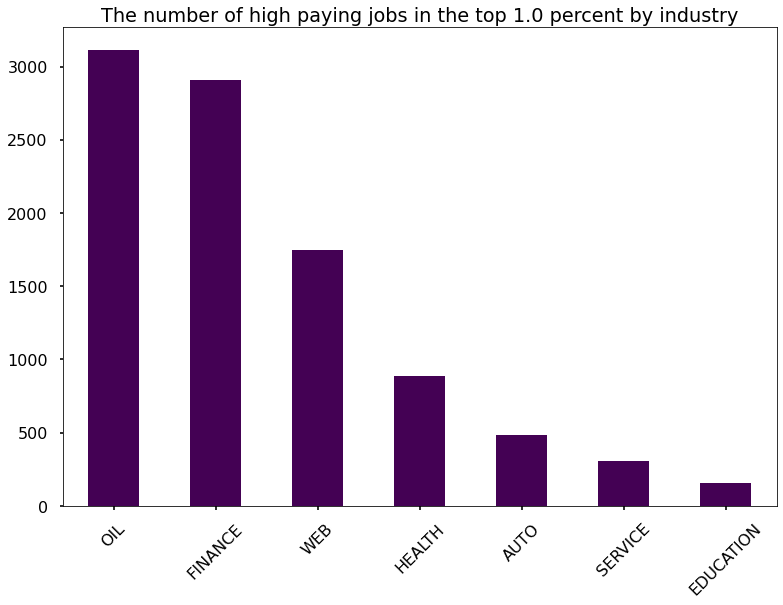

In [15]:
highest_and_lowest_salaries_plot(full_data,'high','industry',0.01)

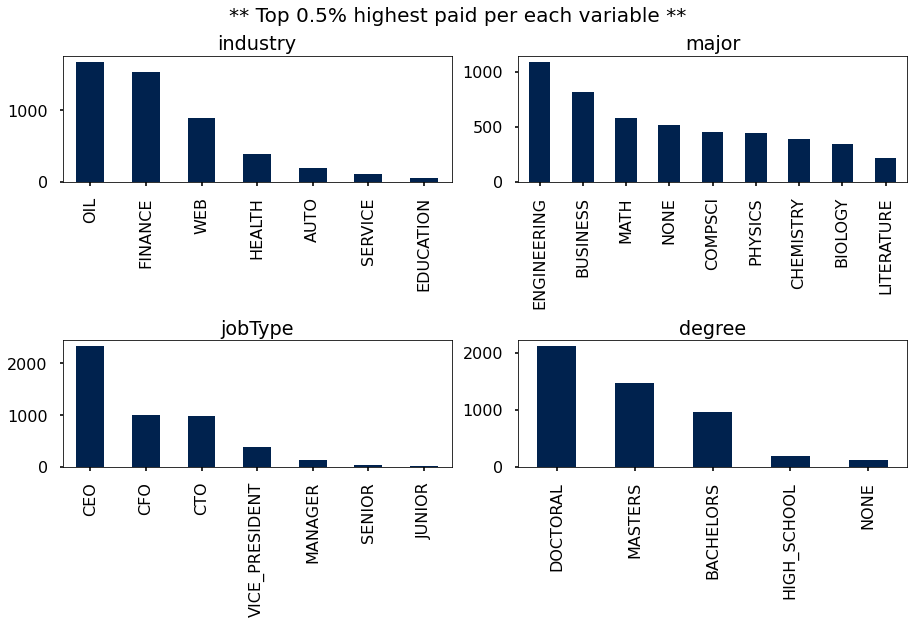

In [16]:
columns = ['industry','jobType','degree','major']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
top = full_data['salary'].quantile(1 - 0.005)
top_sal = full_data[full_data.salary > top]

fig.suptitle('** Top 0.5% highest paid per each variable **', fontsize=20)

top_sal['industry'].value_counts().plot.bar(ax = ax1,colormap = 'cividis')
ax1.set_title('industry')

top_sal['major'].value_counts().plot.bar(ax = ax2,colormap = 'cividis')
ax2.set_title('major')

top_sal['jobType'].value_counts().plot.bar(ax = ax3,colormap = 'cividis')
ax3.set_title('jobType')

top_sal['degree'].value_counts().plot.bar(ax = ax4,colormap = 'cividis')
ax4.set_title('degree')

plt.tight_layout()



In the top 0.5% of highest paying jobs there are a bunch of Junior roles and with no degree. 

In [17]:
top_sal[(top_sal['degree'] == 'NONE')].jobType.value_counts()

CEO               73
CFO               28
CTO               20
VICE_PRESIDENT     2
Name: jobType, dtype: int64

In [18]:
top_sal[(top_sal['jobType'] == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
743326,JOB1362685151013,COMP14,JUNIOR,DOCTORAL,BUSINESS,FINANCE,19,0,236
787674,JOB1362685195361,COMP43,JUNIOR,DOCTORAL,BUSINESS,FINANCE,18,15,232
796956,JOB1362685204643,COMP30,JUNIOR,MASTERS,BUSINESS,OIL,24,2,228


In [19]:
top_sal[top_sal['jobType'] == 'JUNIOR'].yearsExperience.mean()

21.857142857142858

***
Most of the highest paying **JUNIOR** roles have **Masters Degree**, either work at **oil** or **finance** and have a average experience of **21 years**.
***

A quick <a href ="https://stacker.com/stories/351/35-ceos-who-never-finished-college" target="_blank">search</a> on google showed me that there are a bunch of CEO's without a degree.

Some of them were CEO's of multiple organizations at the same time. 

2 vice presidents are in the highest paid lists 

In [20]:
top_sal[(top_sal['jobType'] == 'VICE_PRESIDENT') & (top_sal['degree'] == 'NONE')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
15987,JOB1362684423674,COMP59,VICE_PRESIDENT,NONE,NONE,WEB,24,2,228
157783,JOB1362684565470,COMP56,VICE_PRESIDENT,NONE,NONE,OIL,23,8,231


2 of the highest paid vice presidents have 23 and 24 years of Experience which could explain the high pay.

There seems to be no apparent relation with other variables. 

Need more information to understand the behaviour

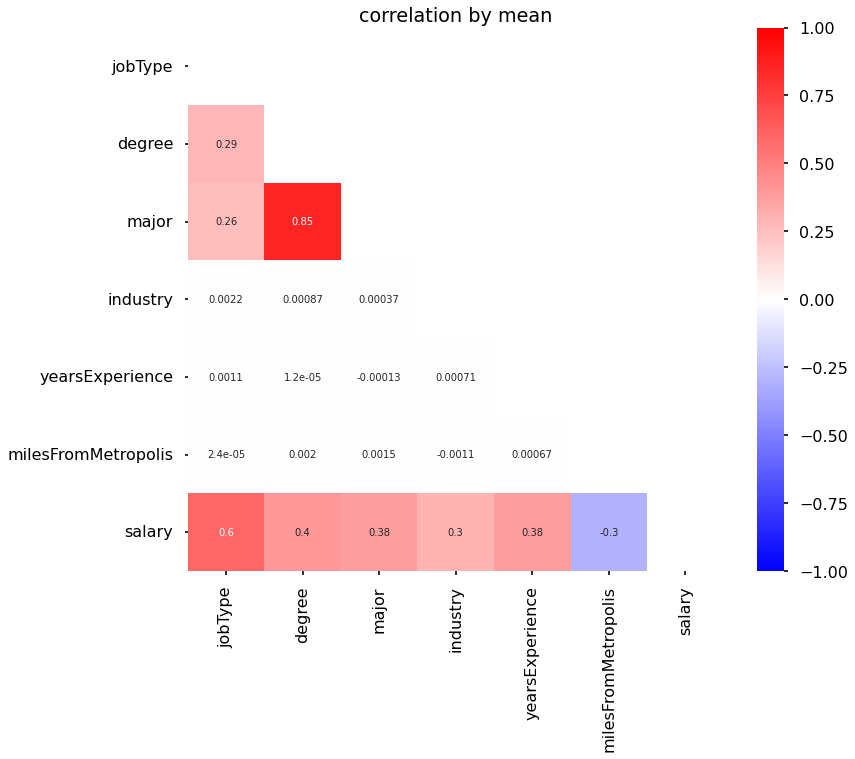

In [21]:
correlation_plot(full_data,['jobType', 'industry', 'degree', 'major'],i = 'mean')

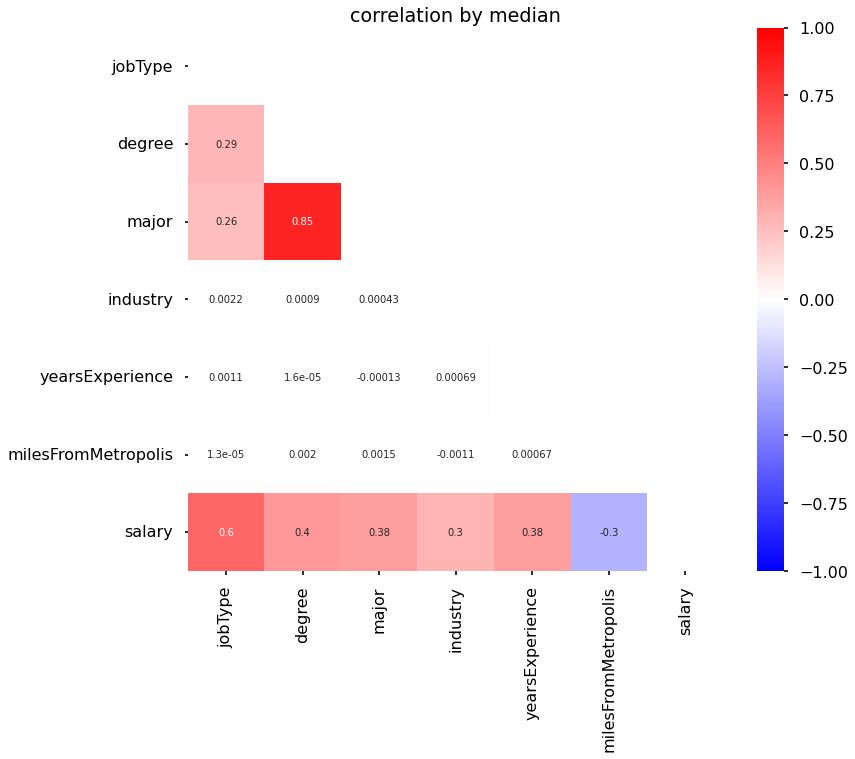

In [22]:
correlation_plot(full_data,['jobType', 'industry', 'degree', 'major'],i = 'median')

* As we can see in both correlation by mean and median there are very few pairs which show correlation. 

* Two of the highest correlated values are degree and major. 

* After that Salary and JobType are related significantly higher.

* Except for milesFromMetropolis all other variables are positively correlated with salary

# Creating splits and baseline model

In [23]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [24]:
full_data.reset_index(inplace=True,drop=True)
scaler = StandardScaler()
scaled  = scaler.fit_transform(full_data[['yearsExperience','milesFromMetropolis']])
full_data[['yearsExperience','milesFromMetropolis']] = pd.DataFrame(scaled)
full_data.set_index('jobId',inplace=True)

<AxesSubplot:xlabel='companyId'>

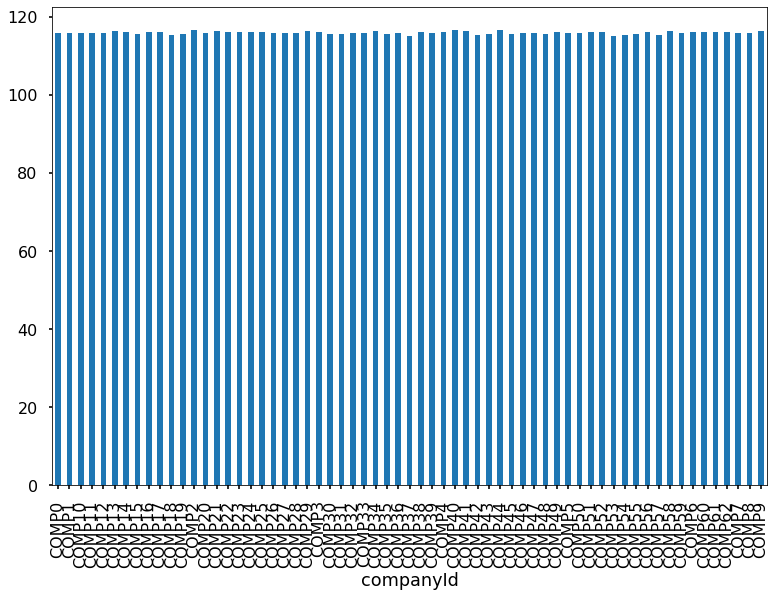

In [25]:
full_data.groupby(['companyId'])['salary'].mean().plot(kind ='bar')

companyId has 63 variables and each class has almost the equal mean.

there is no real value added to the model so we remove the column. 

In [26]:
full_data.drop('companyId',axis = 1,inplace=True)

In [27]:
unique_and_null_categorical(full_data)

jobType : 
 ['CFO' 'CEO' 'VICE_PRESIDENT' 'MANAGER' 'JUNIOR' 'JANITOR' 'CTO' 'SENIOR'] 
 number of unique values: 8

degree : 
 ['MASTERS' 'HIGH_SCHOOL' 'DOCTORAL' 'BACHELORS' 'NONE'] 
 number of unique values: 5

major : 
 ['MATH' 'NONE' 'PHYSICS' 'CHEMISTRY' 'COMPSCI' 'BIOLOGY' 'LITERATURE'
 'BUSINESS' 'ENGINEERING'] 
 number of unique values: 9

industry : 
 ['HEALTH' 'WEB' 'AUTO' 'FINANCE' 'EDUCATION' 'OIL' 'SERVICE'] 
 number of unique values: 7



In [28]:
full_data.dtypes

jobType                 object
degree                  object
major                   object
industry                object
yearsExperience        float64
milesFromMetropolis    float64
salary                   int64
dtype: object

In [29]:
def encode_and_bind(original_dataframe):
    dataset_cat = pd.DataFrame(original_dataframe.select_dtypes(include='object'))
    for i in dataset_cat:        
        dummies = pd.get_dummies(original_dataframe[[i]])
        original_dataframe = pd.concat([original_dataframe, dummies], axis=1)
        original_dataframe = original_dataframe.drop([i], axis=1)
    return(original_dataframe) 

In [30]:
full_data = encode_and_bind(full_data)

**baseline model**

In [33]:
x = full_data.drop('salary',axis = 1)
y = full_data.salary

model = LinearRegression()

scores = cross_val_score(model, x, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
scores.std()

0.74 accuracy with a standard deviation of 0.00


0.0004688179446895931